## Establish connection with Elastic Cloud

Test using sample data available already in elasticsearch 

In [65]:
import eland as ed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch

# Import standard test settings for consistent results
#from eland.conftest import *


It is for pretty-printing JSON

In [3]:
# Function for pretty-printing JSON
def json(x):
    import json
    print(json.dumps(x, indent=2, sort_keys=True))

Connection established with Locally installed Elasticsearch

In [5]:
# Connecting to an Elasticsearch instance running on 'localhost:9200'

# Password for the 'elastic' user generated by Elasticsearch

ELASTIC_PASSWORD = "BhLx5yuA9DELq3C9nFV9"

# Create the client instance
es = Elasticsearch ( "https://localhost:9200",
    ca_certs="/Users/I506302/pmp/elasticsearch-8.6.0/config/certs/http_ca.crt",
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
es.info()
# {'name': 'instance-0000000000', 'cluster_name': ...}

df = ed.DataFrame(es, es_index_pattern="server_metric")

ed_server = ed.DataFrame(es, 'server_metric')


In [6]:
#ed_orders.columns
type(ed_server)

eland.dataframe.DataFrame

In [7]:
# Compare to pandas DataFrame (created from the same data)
#pd_server = ed.eland_to_pandas(ed_server)

#type(pd_server)

In [8]:
ed_server.columns

Index(['@timestamp', '@version', 'accept', 'deny', 'event.original', 'host',
       'index._id', 'index._index', 'index._type', 'log.file.path', 'message',
       'response', 'service', 'total'],
      dtype='object')

In [9]:
ed_server.dtypes

@timestamp        datetime64[ns]
@version                  object
accept                     int64
deny                       int64
event.original            object
host                      object
index._id                 object
index._index              object
index._type               object
log.file.path             object
message                   object
response                 float64
service                   object
total                      int64
dtype: object

In [23]:
ed_server.empty

False

In [10]:
ed_server.shape

(860643, 14)

In [11]:
ed_server.select_dtypes(include=np.number)

/opt/homebrew/lib/python3.10/site-packages/eland/ndframe.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return head.append(tail)
/opt/homebrew/lib/python3.10/site-packages/eland/ndframe.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return head.append(tail)


,accept,deny,response,total
trFy-IUB0bO0oGE2tF-q,19724,1685,2.265384,21409
uLFy-IUB0bO0oGE2tF-q,82704,3837,2.310020,86541
urFy-IUB0bO0oGE2tF-q,429,91,2.424053,520
vLFy-IUB0bO0oGE2tF-q,22154,687,2.318287,22841
vrFy-IUB0bO0oGE2tF-q,20299,2221,2.235936,22520
...,...,...,...,...
AqVp-IUB0bO0oGE2jgh1,13252,536,2.346467,13788
BKVp-IUB0bO0oGE2jgh1,42523,7351,2.580090,49874
BqVp-IUB0bO0oGE2jgh1,26476,2583,2.448851,29059
CKVp-IUB0bO0oGE2jgh1,74002,5317,1.945380,79319


In [12]:
ed_server.index

In [13]:
ed_server.index.es_index_field

'_id'

In [14]:
ed_server.head()

/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(


,@timestamp,@version,accept,deny,event.original,host,index._id,index._index,index._type,log.file.path,message,response,service,total
trFy-IUB0bO0oGE2tF-q,2017-04-09 03:37:00+00:00,1,19724,1685,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":1...",server_1,NaN,NaN,NaN,/Users/I506302/Desktop/Research/server_metrics...,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":1...",2.265384,app_2,21409
uLFy-IUB0bO0oGE2tF-q,2017-04-09 03:37:00+00:00,1,82704,3837,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":8...",server_1,NaN,NaN,NaN,/Users/I506302/Desktop/Research/server_metrics...,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":8...",2.310020,app_5,86541
urFy-IUB0bO0oGE2tF-q,2017-04-09 03:37:00+00:00,1,429,91,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":4...",server_1,NaN,NaN,NaN,/Users/I506302/Desktop/Research/server_metrics...,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":4...",2.424053,app_6,520
vLFy-IUB0bO0oGE2tF-q,2017-04-09 03:37:00+00:00,1,22154,687,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":2...",server_1,NaN,NaN,NaN,/Users/I506302/Desktop/Research/server_metrics...,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":2...",2.318287,app_4,22841
vrFy-IUB0bO0oGE2tF-q,2017-04-09 03:37:00+00:00,1,20299,2221,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":2...",server_2,NaN,NaN,NaN,/Users/I506302/Desktop/Research/server_metrics...,"{""@timestamp"":""2017-04-09T05:37:00"",""accept"":2...",2.235936,app_4,22520


In [15]:
ed_server.keys()

Index(['@timestamp', '@version', 'accept', 'deny', 'event.original', 'host',
       'index._id', 'index._index', 'index._type', 'log.file.path', 'message',
       'response', 'service', 'total'],
      dtype='object')

In [17]:
ed_server.info()

/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(


<class 'eland.dataframe.DataFrame'>
Index: 860643 entries, trFy-IUB0bO0oGE2tF-q to CqVp-IUB0bO0oGE2jgh1
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   @timestamp      815346 non-null  datetime64[ns]
 1   @version        770049 non-null  object        
 2   accept          815346 non-null  int64         
 3   deny            815346 non-null  int64         
 4   event.original  770049 non-null  object        
 5   host            815346 non-null  object        
 6   index._id       45297 non-null   object        
 7   index._index    45297 non-null   object        
 8   index._type     45297 non-null   object        
 9   log.file.path   770049 non-null  object        
 10  message         770049 non-null  object        
 11  response        815346 non-null  float64       
 12  service         815346 non-null  object        
 13  total           815346 non-null  int64         
dtypes: datetim

/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(


In [18]:
ed_server.describe()

,accept,deny,response,total
count,815346.000000,815346.000000,815346.000000,815346.000000
mean,24031.051137,2735.850134,2.286857,26766.901270
std,21965.641860,3255.909541,0.206592,24319.002492
min,-8955.000000,-2201.000000,1.662366,-11156.000000
25%,7302.280095,539.098755,2.086910,8227.234856
50%,17918.953732,1725.475116,2.345365,20006.160872
75%,34905.483981,3746.530120,2.443328,38916.076400
max,133814.000000,66548.000000,3.703266,145266.000000


In [19]:
try: 
    ed_server.values
except AttributeError as e:
    print(e)

This method would scan/scroll the entire Elasticsearch index(s) into memory. If this is explicitly required, and there is sufficient memory, call `ed.eland_to_pandas(ed_df).values`


In [20]:
ed.eland_to_pandas(ed_df).values

NameError: name 'ed_df' is not defined

In [62]:
ed_server.info()

/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(


<class 'eland.dataframe.DataFrame'>
Index: 860643 entries, trFy-IUB0bO0oGE2tF-q to CqVp-IUB0bO0oGE2jgh1
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   @timestamp      815346 non-null  datetime64[ns]
 1   @version        770049 non-null  object        
 2   accept          815346 non-null  int64         
 3   deny            815346 non-null  int64         
 4   event.original  770049 non-null  object        
 5   host            815346 non-null  object        
 6   index._id       45297 non-null   object        
 7   index._index    45297 non-null   object        
 8   index._type     45297 non-null   object        
 9   log.file.path   770049 non-null  object        
 10  message         770049 non-null  object        
 11  response        815346 non-null  float64       
 12  service         815346 non-null  object        
 13  total           815346 non-null  int64         
dtypes: datetim

/opt/homebrew/lib/python3.10/site-packages/eland/common.py:299: Warning: The 'iso8601' format is not explicitly supported.Using pandas.to_datetime(value) to parse value
  warnings.warn(


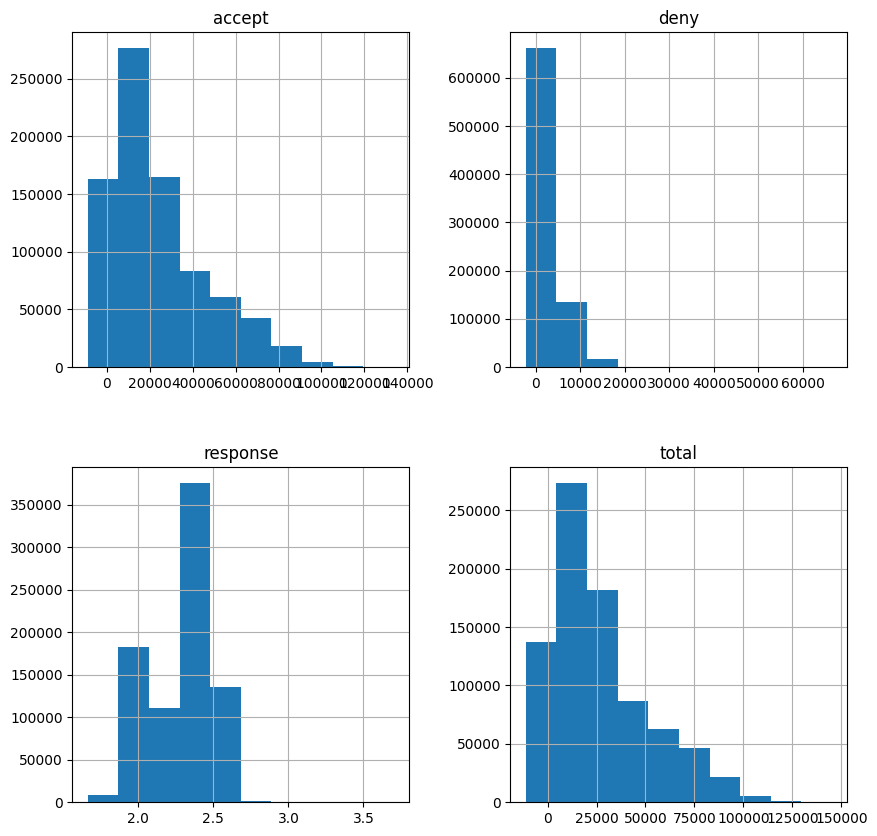

In [64]:
ed_server.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

Connection established with Elastic cloud

In [22]:

# Connecting to an Elasticsearch instance running on 'localhost:9200'

# es = Elasticsearch(basic_auth=('elastic','BhLx5yuA9DELq3C9nFV9'), hosts=["https://localhost:9200"])

# df = ed.DataFrame(es, es_index_pattern="servermetric")

# Connecting to an Elasticsearch instance running on 'localhost:9200'
#df = ed.DataFrame("localhost:9200", es_index_pattern="server_metrics")

# Connecting to an Elastic Cloud instance
#from elasticsearch import Elasticsearch


es = Elasticsearch(
     cloud_id="My_deployment:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyRkN2IwNjkxOGI4YzA0MmJjYjY0NDBmMjM3Zjk3ZjI5YyQ1OTY1Y2ZlYTg3NGY0NzY4Yjk4OGJiOWUyYTc5MWYzZQ==",
     basic_auth=("elastic", "b4hwqyKnokN6vAkWvRo6SkuB"),

)
        
df = ed.DataFrame(es, es_index_pattern="kibana_sample_data_ecommerce")

ed_flights = ed.DataFrame(es, 'kibana_sample_data_flights')


#ed_orders = ed.read_es(es,"kibana_sample_data_ecommerce")


In [23]:
#ed_orders.columns

type(ed_flights)

eland.dataframe.DataFrame

In [24]:
# Compare to pandas DataFrame (created from the same data)
pd_flights = ed.eland_to_pandas(ed_flights)

type(pd_flights)

pandas.core.frame.DataFrame

In [25]:
pd_flights.columns

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID',
       'DestCityName', 'DestCountry', 'DestLocation', 'DestRegion',
       'DestWeather', 'DistanceKilometers', 'DistanceMiles', 'FlightDelay',
       'FlightDelayMin', 'FlightDelayType', 'FlightNum', 'FlightTimeHour',
       'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather',
       'dayOfWeek', 'timestamp'],
      dtype='object')

In [26]:
ed_flights.columns

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID',
       'DestCityName', 'DestCountry', 'DestLocation', 'DestRegion',
       'DestWeather', 'DistanceKilometers', 'DistanceMiles', 'FlightDelay',
       'FlightDelayMin', 'FlightDelayType', 'FlightNum', 'FlightTimeHour',
       'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather',
       'dayOfWeek', 'timestamp'],
      dtype='object')

In [27]:
pd_flights.dtypes

AvgTicketPrice               float64
Cancelled                       bool
Carrier                       object
Dest                          object
DestAirportID                 object
DestCityName                  object
DestCountry                   object
DestLocation                  object
DestRegion                    object
DestWeather                   object
DistanceKilometers           float64
DistanceMiles                float64
FlightDelay                     bool
FlightDelayMin                 int64
FlightDelayType               object
FlightNum                     object
FlightTimeHour               float64
FlightTimeMin                float64
Origin                        object
OriginAirportID               object
OriginCityName                object
OriginCountry                 object
OriginLocation                object
OriginRegion                  object
OriginWeather                 object
dayOfWeek                      int64
timestamp             datetime64[ns]
d

In [28]:
ed_flights.dtypes

AvgTicketPrice               float64
Cancelled                       bool
Carrier                       object
Dest                          object
DestAirportID                 object
DestCityName                  object
DestCountry                   object
DestLocation                  object
DestRegion                    object
DestWeather                   object
DistanceKilometers           float64
DistanceMiles                float64
FlightDelay                     bool
FlightDelayMin                 int64
FlightDelayType               object
FlightNum                     object
FlightTimeHour                object
FlightTimeMin                float64
Origin                        object
OriginAirportID               object
OriginCityName                object
OriginCountry                 object
OriginLocation                object
OriginRegion                  object
OriginWeather                 object
dayOfWeek                      int64
timestamp             datetime64[ns]
d

In [29]:
pd_flights.select_dtypes(include=np.number)

,AvgTicketPrice,DistanceKilometers,DistanceMiles,FlightDelayMin,FlightTimeHour,FlightTimeMin,dayOfWeek
774B7IUBNPksgEmk7wSj,841.265642,16492.326654,10247.856676,0,17.179507,1030.770416,0
8L4B7IUBNPksgEmk7wSj,882.982662,8823.400140,5482.606665,0,7.739825,464.389481,0
8b4B7IUBNPksgEmk7wSj,190.636904,0.000000,0.000000,0,0.000000,0.000000,0
8r4B7IUBNPksgEmk7wSj,181.694216,555.737767,345.319439,180,3.712484,222.749059,0
874B7IUBNPksgEmk7wSj,730.041778,13358.244200,8300.428125,0,13.096318,785.779071,0
...,...,...,...,...,...,...,...
kL4C7IUBNPksgEmkEjo5,1080.446279,8058.581753,5007.370551,0,6.715485,402.929088,6
kb4C7IUBNPksgEmkEjo5,646.612941,7088.598322,4404.650791,0,10.740300,644.418029,6
kr4C7IUBNPksgEmkEjo5,997.751876,10920.652972,6785.779157,255,15.625680,937.540811,6
k74C7IUBNPksgEmkEjo5,1102.814465,18748.859647,11650.001272,135,28.290083,1697.404971,6


In [30]:
pd_flights.empty

False

In [31]:
ed_flights.empty

False

In [32]:
pd_flights.shape

(13059, 27)

In [33]:
ed_flights.shape

(13059, 27)

In [34]:
# Note, eland.DataFrame.index does not mirror pandas.DataFrame.index.

pd_flights.index

Index(['774B7IUBNPksgEmk7wSj', '8L4B7IUBNPksgEmk7wSj', '8b4B7IUBNPksgEmk7wSj',
       '8r4B7IUBNPksgEmk7wSj', '874B7IUBNPksgEmk7wSj', '9L4B7IUBNPksgEmk7wSj',
       '9b4B7IUBNPksgEmk7wSj', '9r4B7IUBNPksgEmk7wSj', '974B7IUBNPksgEmk7wSj',
       '-L4B7IUBNPksgEmk7wSj',
       ...
       'i74C7IUBNPksgEmkEjo5', 'jL4C7IUBNPksgEmkEjo5', 'jb4C7IUBNPksgEmkEjo5',
       'jr4C7IUBNPksgEmkEjo5', 'j74C7IUBNPksgEmkEjo5', 'kL4C7IUBNPksgEmkEjo5',
       'kb4C7IUBNPksgEmkEjo5', 'kr4C7IUBNPksgEmkEjo5', 'k74C7IUBNPksgEmkEjo5',
       'lL4C7IUBNPksgEmkEjo5'],
      dtype='object', length=13059)

In [35]:
ed_flights.index

In [36]:
ed_flights.index.es_index_field

'_id'

In [37]:
#Note, eland.DataFrame.values is not supported.
pd_flights.values

array([[841.2656419677076, False, 'Kibana Airlines', ..., 'Sunny', 0,
        Timestamp('2023-01-16 00:00:00')],
       [882.9826615595518, False, 'Logstash Airways', ..., 'Clear', 0,
        Timestamp('2023-01-16 18:27:00')],
       [190.6369038508356, False, 'Logstash Airways', ..., 'Rain', 0,
        Timestamp('2023-01-16 17:11:14')],
       ...,
       [997.7518761454494, False, 'Logstash Airways', ..., 'Sunny', 6,
        Timestamp('2023-02-26 04:09:27')],
       [1102.8144645388556, False, 'JetBeats', ..., 'Hail', 6,
        Timestamp('2023-02-26 08:28:21')],
       [858.1443369038839, False, 'JetBeats', ..., 'Rain', 6,
        Timestamp('2023-02-26 14:54:34')]], dtype=object)

In [38]:
try: 
    ed_flights.values
except AttributeError as e:
    print(e)

This method would scan/scroll the entire Elasticsearch index(s) into memory. If this is explicitly required, and there is sufficient memory, call `ed.eland_to_pandas(ed_df).values`


In [39]:
pd_flights.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
774B7IUBNPksgEmk7wSj,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2023-01-16 00:00:00
8L4B7IUBNPksgEmk7wSj,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2023-01-16 18:27:00
8b4B7IUBNPksgEmk7wSj,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2023-01-16 17:11:14
8r4B7IUBNPksgEmk7wSj,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2023-01-16 10:33:28
874B7IUBNPksgEmk7wSj,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2023-01-16 05:13:00


In [40]:
ed_flights.head()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
774B7IUBNPksgEmk7wSj,841.265642,False,Kibana Airlines,Sydney Kingsford Smith International Airport,SYD,Sydney,AU,"{'lat': '-33.94609833', 'lon': '151.177002'}",SE-BD,Rain,...,1030.770416,Frankfurt am Main Airport,FRA,Frankfurt am Main,DE,"{'lat': '50.033333', 'lon': '8.570556'}",DE-HE,Sunny,0,2023-01-16 00:00:00
8L4B7IUBNPksgEmk7wSj,882.982662,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Sunny,...,464.389481,Cape Town International Airport,CPT,Cape Town,ZA,"{'lat': '-33.96480179', 'lon': '18.60169983'}",SE-BD,Clear,0,2023-01-16 18:27:00
8b4B7IUBNPksgEmk7wSj,190.636904,False,Logstash Airways,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Cloudy,...,0.000000,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Rain,0,2023-01-16 17:11:14
8r4B7IUBNPksgEmk7wSj,181.694216,True,Kibana Airlines,Treviso-Sant'Angelo Airport,TV01,Treviso,IT,"{'lat': '45.648399', 'lon': '12.1944'}",IT-34,Clear,...,222.749059,Naples International Airport,NA01,Naples,IT,"{'lat': '40.886002', 'lon': '14.2908'}",IT-72,Thunder & Lightning,0,2023-01-16 10:33:28
874B7IUBNPksgEmk7wSj,730.041778,False,Kibana Airlines,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Clear,...,785.779071,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Damaging Wind,0,2023-01-16 05:13:00


In [41]:
pd_flights.tail()

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
kL4C7IUBNPksgEmkEjo5,1080.446279,False,Logstash Airways,Xi'an Xianyang International Airport,XIY,Xi'an,CN,"{'lat': '34.447102', 'lon': '108.751999'}",SE-BD,Rain,...,402.929088,Pisa International Airport,PI05,Pisa,IT,"{'lat': '43.683899', 'lon': '10.3927'}",IT-52,Sunny,6,2023-02-26 20:42:25
kb4C7IUBNPksgEmkEjo5,646.612941,False,Logstash Airways,Zurich Airport,ZRH,Zurich,CH,"{'lat': '47.464699', 'lon': '8.54917'}",CH-ZH,Rain,...,644.418029,Winnipeg / James Armstrong Richardson Internat...,YWG,Winnipeg,CA,"{'lat': '49.90999985', 'lon': '-97.23989868'}",CA-MB,Rain,6,2023-02-26 01:41:57
kr4C7IUBNPksgEmkEjo5,997.751876,False,Logstash Airways,Ukrainka Air Base,XHBU,Belogorsk,RU,"{'lat': '51.169997', 'lon': '128.445007'}",RU-AMU,Rain,...,937.540811,Licenciado Benito Juarez International Airport,AICM,Mexico City,MX,"{'lat': '19.4363', 'lon': '-99.072098'}",MX-DIF,Sunny,6,2023-02-26 04:09:27
k74C7IUBNPksgEmkEjo5,1102.814465,False,JetBeats,Ministro Pistarini International Airport,EZE,Buenos Aires,AR,"{'lat': '-34.8222', 'lon': '-58.5358'}",SE-BD,Hail,...,1697.404971,Itami Airport,ITM,Osaka,JP,"{'lat': '34.78549957', 'lon': '135.4380035'}",SE-BD,Hail,6,2023-02-26 08:28:21
lL4C7IUBNPksgEmkEjo5,858.144337,False,JetBeats,Washington Dulles International Airport,IAD,Washington,US,"{'lat': '38.94449997', 'lon': '-77.45580292'}",US-DC,Heavy Fog,...,1610.761827,Adelaide International Airport,ADL,Adelaide,AU,"{'lat': '-34.945', 'lon': '138.531006'}",SE-BD,Rain,6,2023-02-26 14:54:34


In [42]:
pd_flights.keys()

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID',
       'DestCityName', 'DestCountry', 'DestLocation', 'DestRegion',
       'DestWeather', 'DistanceKilometers', 'DistanceMiles', 'FlightDelay',
       'FlightDelayMin', 'FlightDelayType', 'FlightNum', 'FlightTimeHour',
       'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather',
       'dayOfWeek', 'timestamp'],
      dtype='object')

In [43]:
ed_flights.keys()

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID',
       'DestCityName', 'DestCountry', 'DestLocation', 'DestRegion',
       'DestWeather', 'DistanceKilometers', 'DistanceMiles', 'FlightDelay',
       'FlightDelayMin', 'FlightDelayType', 'FlightNum', 'FlightTimeHour',
       'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather',
       'dayOfWeek', 'timestamp'],
      dtype='object')

In [44]:
pd_flights.get('Carrier')

774B7IUBNPksgEmk7wSj     Kibana Airlines
8L4B7IUBNPksgEmk7wSj    Logstash Airways
8b4B7IUBNPksgEmk7wSj    Logstash Airways
8r4B7IUBNPksgEmk7wSj     Kibana Airlines
874B7IUBNPksgEmk7wSj     Kibana Airlines
                              ...       
kL4C7IUBNPksgEmkEjo5    Logstash Airways
kb4C7IUBNPksgEmkEjo5    Logstash Airways
kr4C7IUBNPksgEmkEjo5    Logstash Airways
k74C7IUBNPksgEmkEjo5            JetBeats
lL4C7IUBNPksgEmkEjo5            JetBeats
Name: Carrier, Length: 13059, dtype: object

In [45]:
ed_flights.get('Carrier')

/opt/homebrew/lib/python3.10/site-packages/eland/ndframe.py:175: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return head.append(tail)


774B7IUBNPksgEmk7wSj     Kibana Airlines
8L4B7IUBNPksgEmk7wSj    Logstash Airways
8b4B7IUBNPksgEmk7wSj    Logstash Airways
8r4B7IUBNPksgEmk7wSj     Kibana Airlines
874B7IUBNPksgEmk7wSj     Kibana Airlines
                              ...       
k74C7IUBNPksgEmkEjo5            JetBeats
kL4C7IUBNPksgEmkEjo5    Logstash Airways
kb4C7IUBNPksgEmkEjo5    Logstash Airways
kr4C7IUBNPksgEmkEjo5    Logstash Airways
lL4C7IUBNPksgEmkEjo5            JetBeats
Name: Carrier, Length: 13059, dtype: object

In [48]:
pd_flights.get(['Carrier', 'Origin'])

,Carrier,Origin
774B7IUBNPksgEmk7wSj,Kibana Airlines,Frankfurt am Main Airport
8L4B7IUBNPksgEmk7wSj,Logstash Airways,Cape Town International Airport
8b4B7IUBNPksgEmk7wSj,Logstash Airways,Venice Marco Polo Airport
8r4B7IUBNPksgEmk7wSj,Kibana Airlines,Naples International Airport
874B7IUBNPksgEmk7wSj,Kibana Airlines,Licenciado Benito Juarez International Airport
...,...,...
kL4C7IUBNPksgEmkEjo5,Logstash Airways,Pisa International Airport
kb4C7IUBNPksgEmkEjo5,Logstash Airways,Winnipeg / James Armstrong Richardson Internat...
kr4C7IUBNPksgEmkEjo5,Logstash Airways,Licenciado Benito Juarez International Airport
k74C7IUBNPksgEmkEjo5,JetBeats,Itami Airport


In [49]:
#List input not currently supported by eland.DataFrame.get

try:
    ed_flights.get(['Carrier', 'Origin'])
except TypeError as e:
    print(e)

unhashable type: 'list'


In [50]:
pd_flights.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled == True')

,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
974B7IUBNPksgEmk7wSj,960.869736,True,Kibana Airlines,Rajiv Gandhi International Airport,HYD,Hyderabad,IN,"{'lat': '17.23131752', 'lon': '78.42985535'}",SE-BD,Cloudy,...,602.030591,Milano Linate Airport,MI11,Milan,IT,"{'lat': '45.445099', 'lon': '9.27674'}",IT-25,Heavy Fog,0,2023-01-16 12:09:35
Cb4B7IUBNPksgEmk7wWj,975.812632,True,Kibana Airlines,Itami Airport,ITM,Osaka,JP,"{'lat': '34.78549957', 'lon': '135.4380035'}",SE-BD,Hail,...,386.259764,Helsinki Vantaa Airport,HEL,Helsinki,FI,"{'lat': '60.31719971', 'lon': '24.9633007'}",FI-ES,Rain,0,2023-01-16 15:38:32
Jr4B7IUBNPksgEmk7waj,946.358410,True,Kibana Airlines,Gimpo International Airport,GMP,Seoul,KR,"{'lat': '37.5583', 'lon': '126.791'}",SE-BD,Clear,...,549.776312,Brisbane International Airport,BNE,Brisbane,AU,"{'lat': '-27.38419914', 'lon': '153.1170044'}",SE-BD,Heavy Fog,0,2023-01-16 11:51:12
er4B7IUBNPksgEmk8AeM,975.383864,True,Kibana Airlines,Oslo Gardermoen Airport,OSL,Oslo,NO,"{'lat': '60.19390106', 'lon': '11.10039997'}",NO-02,Damaging Wind,...,455.248867,New Chitose Airport,CTS,Chitose / Tomakomai,JP,"{'lat': '42.77519989', 'lon': '141.6920013'}",SE-BD,Rain,2,2023-01-18 21:13:17
pb4B7IUBNPksgEmk8AiM,907.836523,True,Kibana Airlines,Oslo Gardermoen Airport,OSL,Oslo,NO,"{'lat': '60.19390106', 'lon': '11.10039997'}",NO-02,Heavy Fog,...,768.341881,Mariscal Sucre International Airport,UIO,Quito,EC,"{'lat': '-0.129166667', 'lon': '-78.3575'}",EC-P,Thunder & Lightning,2,2023-01-18 05:14:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pr4C7IUBNPksgEmkETm7,909.973606,True,Kibana Airlines,Ottawa Macdonald-Cartier International Airport,YOW,Ottawa,CA,"{'lat': '45.32249832', 'lon': '-75.66919708'}",CA-ON,Damaging Wind,...,556.371247,Incheon International Airport,ICN,Seoul,KR,"{'lat': '37.46910095', 'lon': '126.4509964'}",SE-BD,Cloudy,5,2023-02-25 05:11:35
_L4C7IUBNPksgEmkETm7,983.429244,True,Kibana Airlines,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Thunder & Lightning,...,685.518902,Chhatrapati Shivaji International Airport,BOM,Mumbai,IN,"{'lat': '19.08869934', 'lon': '72.86789703'}",SE-BD,Thunder & Lightning,6,2023-02-26 06:19:58
CL4C7IUBNPksgEmkETq7,1136.678150,True,Kibana Airlines,Winnipeg / James Armstrong Richardson Internat...,YWG,Winnipeg,CA,"{'lat': '49.90999985', 'lon': '-97.23989868'}",CA-MB,Heavy Fog,...,464.199349,San Antonio International Airport,SAT,San Antonio,US,"{'lat': '29.53370094', 'lon': '-98.46980286'}",US-TX,Cloudy,6,2023-02-26 16:03:10
Cb4C7IUBNPksgEmkETq7,1105.211803,True,Kibana Airlines,Ukrainka Air Base,XHBU,Belogorsk,RU,"{'lat': '51.169997', 'lon': '128.445007'}",RU-AMU,Heavy Fog,...,824.024175,Ottawa Macdonald-Cartier International Airport,YOW,Ottawa,CA,"{'lat': '45.32249832', 'lon': '-75.66919708'}",CA-ON,Clear,6,2023-02-26 05:36:05


In [51]:
ed_flights.query('Carrier == "Kibana Airlines" & AvgTicketPrice > 900.0 & Cancelled == True')

/opt/homebrew/lib/python3.10/site-packages/eland/ndframe.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return head.append(tail)
/opt/homebrew/lib/python3.10/site-packages/eland/ndframe.py:175: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return head.append(tail)


,AvgTicketPrice,Cancelled,Carrier,Dest,DestAirportID,DestCityName,DestCountry,DestLocation,DestRegion,DestWeather,...,FlightTimeMin,Origin,OriginAirportID,OriginCityName,OriginCountry,OriginLocation,OriginRegion,OriginWeather,dayOfWeek,timestamp
974B7IUBNPksgEmk7wSj,960.869736,True,Kibana Airlines,Rajiv Gandhi International Airport,HYD,Hyderabad,IN,"{'lat': '17.23131752', 'lon': '78.42985535'}",SE-BD,Cloudy,...,602.030591,Milano Linate Airport,MI11,Milan,IT,"{'lat': '45.445099', 'lon': '9.27674'}",IT-25,Heavy Fog,0,2023-01-16 12:09:35
Cb4B7IUBNPksgEmk7wWj,975.812632,True,Kibana Airlines,Itami Airport,ITM,Osaka,JP,"{'lat': '34.78549957', 'lon': '135.4380035'}",SE-BD,Hail,...,386.259764,Helsinki Vantaa Airport,HEL,Helsinki,FI,"{'lat': '60.31719971', 'lon': '24.9633007'}",FI-ES,Rain,0,2023-01-16 15:38:32
Jr4B7IUBNPksgEmk7waj,946.358410,True,Kibana Airlines,Gimpo International Airport,GMP,Seoul,KR,"{'lat': '37.5583', 'lon': '126.791'}",SE-BD,Clear,...,549.776312,Brisbane International Airport,BNE,Brisbane,AU,"{'lat': '-27.38419914', 'lon': '153.1170044'}",SE-BD,Heavy Fog,0,2023-01-16 11:51:12
er4B7IUBNPksgEmk8AeM,975.383864,True,Kibana Airlines,Oslo Gardermoen Airport,OSL,Oslo,NO,"{'lat': '60.19390106', 'lon': '11.10039997'}",NO-02,Damaging Wind,...,455.248867,New Chitose Airport,CTS,Chitose / Tomakomai,JP,"{'lat': '42.77519989', 'lon': '141.6920013'}",SE-BD,Rain,2,2023-01-18 21:13:17
pb4B7IUBNPksgEmk8AiM,907.836523,True,Kibana Airlines,Oslo Gardermoen Airport,OSL,Oslo,NO,"{'lat': '60.19390106', 'lon': '11.10039997'}",NO-02,Heavy Fog,...,768.341881,Mariscal Sucre International Airport,UIO,Quito,EC,"{'lat': '-0.129166667', 'lon': '-78.3575'}",EC-P,Thunder & Lightning,2,2023-01-18 05:14:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CL4C7IUBNPksgEmkETq7,1136.678150,True,Kibana Airlines,Winnipeg / James Armstrong Richardson Internat...,YWG,Winnipeg,CA,"{'lat': '49.90999985', 'lon': '-97.23989868'}",CA-MB,Heavy Fog,...,464.199349,San Antonio International Airport,SAT,San Antonio,US,"{'lat': '29.53370094', 'lon': '-98.46980286'}",US-TX,Cloudy,6,2023-02-26 16:03:10
Cb4C7IUBNPksgEmkETq7,1105.211803,True,Kibana Airlines,Ukrainka Air Base,XHBU,Belogorsk,RU,"{'lat': '51.169997', 'lon': '128.445007'}",RU-AMU,Heavy Fog,...,824.024175,Ottawa Macdonald-Cartier International Airport,YOW,Ottawa,CA,"{'lat': '45.32249832', 'lon': '-75.66919708'}",CA-ON,Clear,6,2023-02-26 05:36:05
Z74C7IUBNPksgEmkEjo4,1055.350213,True,Kibana Airlines,Warsaw Chopin Airport,WAW,Warsaw,PL,"{'lat': '52.16569901', 'lon': '20.96710014'}",PL-MZ,Sunny,...,69.239127,Turin Airport,TO11,Torino,IT,"{'lat': '45.200802', 'lon': '7.64963'}",IT-21,Thunder & Lightning,6,2023-02-26 13:20:16
_L4C7IUBNPksgEmkETm7,983.429244,True,Kibana Airlines,Venice Marco Polo Airport,VE05,Venice,IT,"{'lat': '45.505299', 'lon': '12.3519'}",IT-34,Thunder & Lightning,...,685.518902,Chhatrapati Shivaji International Airport,BOM,Mumbai,IN,"{'lat': '19.08869934', 'lon': '72.86789703'}",SE-BD,Thunder & Lightning,6,2023-02-26 06:19:58


In [52]:
pd_flights.count()

AvgTicketPrice        13059
Cancelled             13059
Carrier               13059
Dest                  13059
DestAirportID         13059
DestCityName          13059
DestCountry           13059
DestLocation          13059
DestRegion            13059
DestWeather           13059
DistanceKilometers    13059
DistanceMiles         13059
FlightDelay           13059
FlightDelayMin        13059
FlightDelayType       13059
FlightNum             13059
FlightTimeHour        13059
FlightTimeMin         13059
Origin                13059
OriginAirportID       13059
OriginCityName        13059
OriginCountry         13059
OriginLocation        13059
OriginRegion          13059
OriginWeather         13059
dayOfWeek             13059
timestamp             13059
dtype: int64

In [53]:
ed_flights.count()

AvgTicketPrice        13059
Cancelled             13059
Carrier               13059
Dest                  13059
DestAirportID         13059
DestCityName          13059
DestCountry           13059
DestLocation          13059
DestRegion            13059
DestWeather           13059
DistanceKilometers    13059
DistanceMiles         13059
FlightDelay           13059
FlightDelayMin        13059
FlightDelayType       13059
FlightNum             13059
FlightTimeHour        13059
FlightTimeMin         13059
Origin                13059
OriginAirportID       13059
OriginCityName        13059
OriginCountry         13059
OriginLocation        13059
OriginRegion          13059
OriginWeather         13059
dayOfWeek             13059
timestamp             13059
dtype: int64

In [54]:
pd_flights.describe()

,AvgTicketPrice,DistanceKilometers,DistanceMiles,FlightDelayMin,FlightTimeHour,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000
mean,628.253689,7092.142455,4406.853013,47.335171,8.518797,511.127842,2.835975
std,266.396861,4578.438497,2844.909787,96.746711,5.579233,334.753952,1.939439
min,100.020528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,409.893816,2459.705673,1528.390247,0.000000,4.205553,252.333192,1.000000
50%,640.556668,7610.330866,4728.840363,0.000000,8.384086,503.045170,3.000000
75%,842.185470,9736.637600,6050.066114,15.000000,12.006934,720.416036,4.000000
max,1199.729053,19881.482315,12353.780369,360.000000,31.715034,1902.902032,6.000000


In [55]:
ed_flights.describe()

,AvgTicketPrice,Cancelled,DistanceKilometers,DistanceMiles,FlightDelay,FlightDelayMin,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000,13059.000000
mean,628.253689,0.128494,7092.142457,4406.853010,0.251168,47.335171,511.127842,2.835975
std,266.407061,0.334664,4578.613803,2845.018714,0.433718,96.750415,334.766770,1.939513
min,100.020531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,410.008918,0.000000,2470.545974,1535.126118,0.000000,0.000000,251.938710,1.000000
50%,640.387285,0.000000,7612.072403,4729.922470,0.000000,0.000000,503.148975,3.000000
75%,842.213490,0.000000,9735.660463,6049.459005,0.884831,15.000000,720.505705,4.000000
max,1199.729004,1.000000,19881.482422,12353.780273,1.000000,360.000000,1902.901978,6.000000


In [56]:
pd_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13059 entries, 774B7IUBNPksgEmk7wSj to lL4C7IUBNPksgEmkEjo5
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AvgTicketPrice      13059 non-null  float64       
 1   Cancelled           13059 non-null  bool          
 2   Carrier             13059 non-null  object        
 3   Dest                13059 non-null  object        
 4   DestAirportID       13059 non-null  object        
 5   DestCityName        13059 non-null  object        
 6   DestCountry         13059 non-null  object        
 7   DestLocation        13059 non-null  object        
 8   DestRegion          13059 non-null  object        
 9   DestWeather         13059 non-null  object        
 10  DistanceKilometers  13059 non-null  float64       
 11  DistanceMiles       13059 non-null  float64       
 12  FlightDelay         13059 non-null  bool          
 13  FlightDelayMin   

In [61]:
ed_flights.info()

<class 'eland.dataframe.DataFrame'>
Index: 13059 entries, 774B7IUBNPksgEmk7wSj to lL4C7IUBNPksgEmkEjo5
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   AvgTicketPrice      13059 non-null  float64       
 1   Cancelled           13059 non-null  bool          
 2   Carrier             13059 non-null  object        
 3   Dest                13059 non-null  object        
 4   DestAirportID       13059 non-null  object        
 5   DestCityName        13059 non-null  object        
 6   DestCountry         13059 non-null  object        
 7   DestLocation        13059 non-null  object        
 8   DestRegion          13059 non-null  object        
 9   DestWeather         13059 non-null  object        
 10  DistanceKilometers  13059 non-null  float64       
 11  DistanceMiles       13059 non-null  float64       
 12  FlightDelay         13059 non-null  bool          
 13  FlightDelayMin     

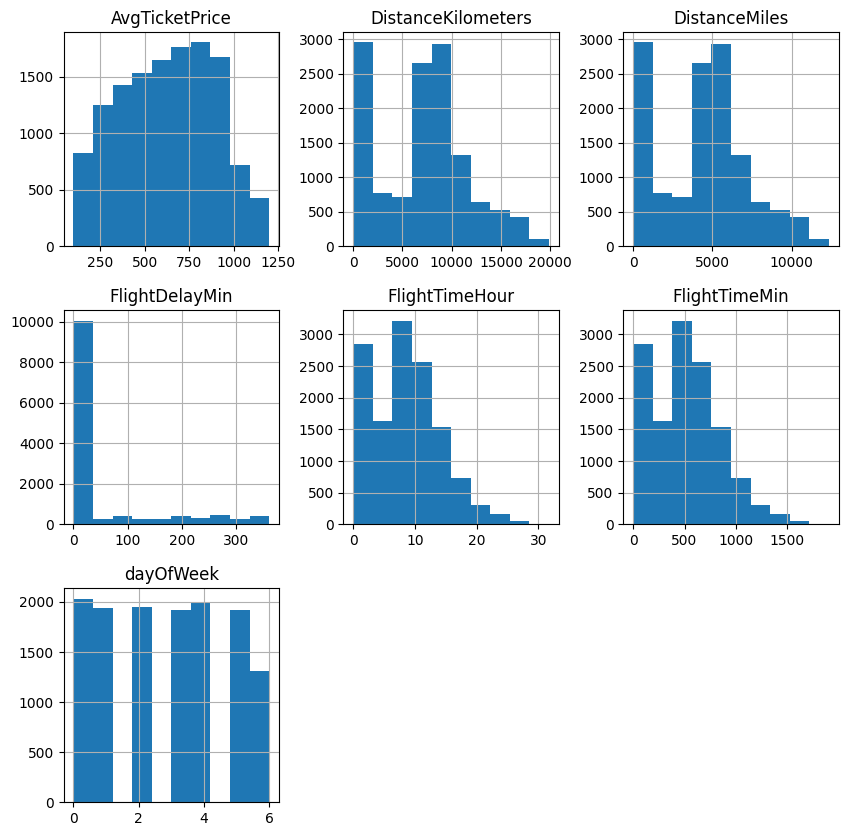

In [58]:
pd_flights.select_dtypes(include=np.number).hist(figsize=[10,10])
plt.show()

In [59]:
#Elasticsearch utilities

ed_flights2 = ed_flights[(ed_flights.OriginAirportID == 'AMS') & (ed_flights.FlightDelayMin > 60)]
ed_flights2 = ed_flights2[['timestamp', 'OriginAirportID', 'DestAirportID', 'FlightDelayMin']]
ed_flights2 = ed_flights2.tail()

In [60]:
print(ed_flights2.es_info())

es_index_pattern: kibana_sample_data_flights
Index:
 es_index_field: _id
 is_source_field: False
Mappings:
 capabilities:
                   es_field_name  is_source es_dtype es_date_format        pd_dtype  is_searchable  is_aggregatable  is_scripted aggregatable_es_field_name
timestamp              timestamp       True     date           None  datetime64[ns]           True             True        False                  timestamp
OriginAirportID  OriginAirportID       True  keyword           None          object           True             True        False            OriginAirportID
DestAirportID      DestAirportID       True  keyword           None          object           True             True        False              DestAirportID
FlightDelayMin    FlightDelayMin       True  integer           None           int64           True             True        False             FlightDelayMin
Operations:
 tasks: [('boolean_filter': ('boolean_filter': {'bool': {'must': [{'term': {'OriginAir